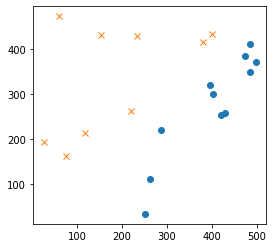

第1次：w = [-152.72031843 -431.58706385]
第2次：w = [321.27968157 -47.58706385]
第3次：w = [  88.27968157 -477.58706385]
第4次：w = [ 484.27968157 -156.58706385]
第5次：w = [  85.27968157 -589.58706385]
第6次：w = [ 488.27968157 -289.58706385]
第7次：w = [ 109.27968157 -705.58706385]
第8次：w = [ 372.27968157 -593.58706385]
第9次：w = [ 846.27968157 -209.58706385]
第10次：w = [ 613.27968157 -639.58706385]


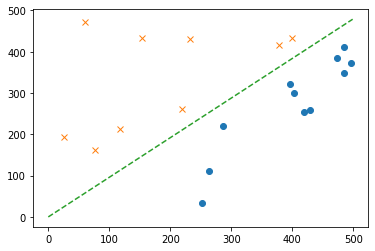

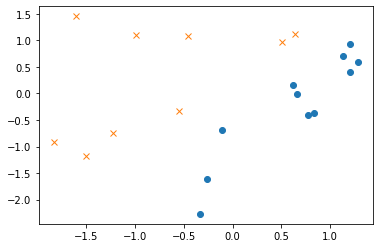

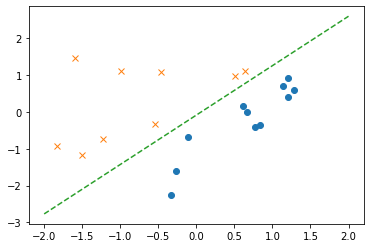

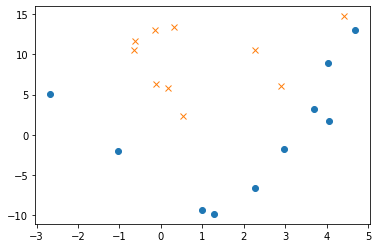

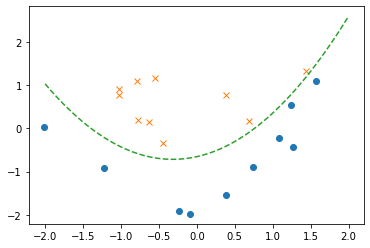

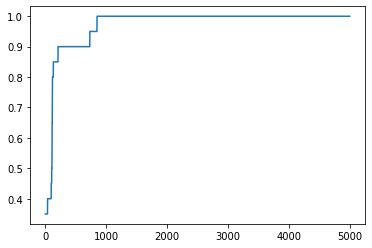

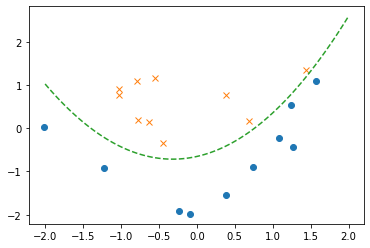

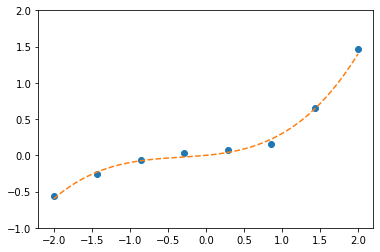

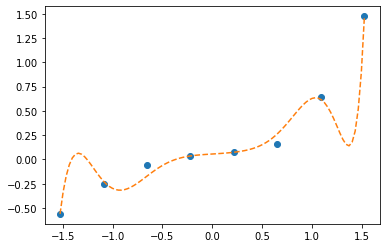

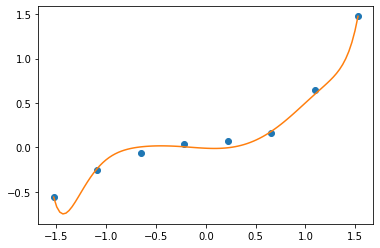

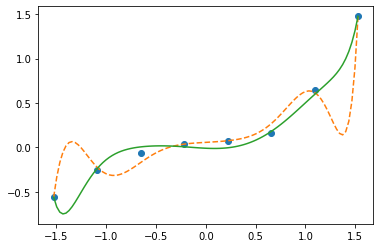

In [6]:
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('./datasets/images1.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')
plt.axis('scaled')
plt.show()

w = np.random.rand(2)
def f(x):
    if np.dot(w, x) >= 0:
        return 1
    else:
        return -1

epoch = 10
count = 0
for _ in range(epoch):
    for x, y in zip(train_x, train_y):
        if f(x) != y:
            w = w + y * x
            count += 1
            print('第{}次：w = {}'.format(count, w))
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')
x1 = np.arange(0, 500)
plt.plot(x1, -w[0] / w[1] * x1, linestyle='dashed')
plt.show()

train = np.loadtxt('./datasets/images2.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma
train_z = standardize(train_x)
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])
X = to_matrix(train_z)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

theta = np.random.rand(3)
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

ETA = 1e-3
epoch = 5000
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
x0 = np.linspace(-2, 2, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()

train = np.loadtxt('./datasets/data3.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'x')
plt.show()
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma
train_z = standardize(train_x)
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:, 0, np.newaxis] ** 2
    return np.hstack([x0, x, x3])
X = to_matrix(train_z)

theta = np.random.rand(4)
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))
ETA = 1e-3
epoch = 5000
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
x0 = np.linspace(-2, 2, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0 + theta[3] * x0 ** 2) / theta[2], linestyle='dashed')
plt.show()

def classify(x):
    return (f(x) >= 0.5).astype(np.int)
theta = np.random.rand(4)
accuracies = []
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    result = classify(X) == train_y
    accuracy = len(result[result == True]) / len(result)
    accuracies.append(accuracy)
x = np.arange(len(accuracies))
plt.plot(x, accuracies)
plt.show()

theta = np.random.rand(4)
for _ in range(epoch):
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p, :], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x1, x2, linestyle='dashed')
plt.show()

def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05
x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')
plt.ylim(-1, 2)
plt.show()

mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma
train_z = standardize(train_x)
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2, x ** 3, x ** 4, x ** 5, x ** 6, x ** 7, x ** 8, x ** 9, x ** 10]).T
X = to_matrix(train_z)
theta = np.random.randn(X.shape[1])
def f(x):
    return np.dot(x, theta)

def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)
ETA = 1e-4
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
z = standardize(x)
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)), linestyle='dashed')
plt.show()

theta1 = theta
theta = np.random.randn(X.shape[1])
LAMBDA = 1
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

theta2 = theta
plt.plot(train_z, train_y, 'o')
theta = theta1
plt.plot(z, f(to_matrix(z)), linestyle='dashed')
theta = theta2
plt.plot(z, f(to_matrix(z)))
plt.show()
